In [ ]:
#pip install transformation-tree into your env to install the package from pip
from transformation_tree.tree import Node, TTree, Pipeline
from transformation_tree.preprocessing import *
from transformation_tree.forecasting import *
from transformation_tree.stats_and_vis import *

# Demo

#### Define operators

In [ ]:
def root():
    return read_from_file("./time_series_data/1_temperature_test.csv")

# Define nodes for pipeline
rootNode = Node(root)
op1 = Node(plot_ts)
op2 = Node(denoise)
op3 = Node(impute_missing_data)
op4 = Node(plot_ts)
op5 = Node(histogram)

#### Initialize TTree & Add Nodes

In [24]:
tree = TTree("Transformation Tree", rootNode)
print(tree)

load_data_op (0)



#### Insert Nodes (potential pipeline)

In [25]:
# Add nodes to the tree
tree.add_node(rootNode, op1)
tree.add_node(op1, op2)
tree.add_node(op2, op3)
tree.add_node(op3, op4)
tree.add_node(op4, op5)
print(tree)

load_data_op (0)
└── plot_ts (1)
    └── denoise (2)
        └── impute_missing_data (3)
            └── plot_ts (4)
                └── histogram (5)



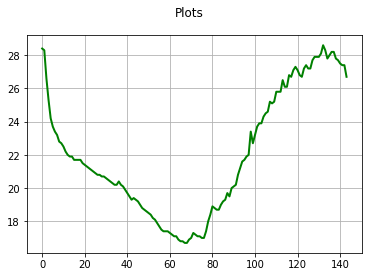

AttributeError: 'list' object has no attribute 'rolling'

In [27]:
tree.execute_tree()